In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [32]:
# Need to decide whether to use normed or un-normed MCMC results
# And what time window for Tohoku

# na_mcmc_results = pd.read_csv('/Users/sydneydybing/StrainProject/2024/3comp_mcmc_arrays/mcmc_results_summary_with_quality.csv')
na_mcmc_results = pd.read_csv('/Users/sydneydybing/StrainProject/2024/3comp_newdetrend_mcmc_arrays/mcmc_results_summary_with_quality.csv')
# na_mcmc_results = pd.read_csv('/Users/sydneydybing/StrainProject/2024/3comp_norm_mcmc_arrays/mcmc_results_summary_with_quality.csv')

# taiwan_mcmc_results = pd.read_csv('/Users/sydneydybing/StrainProject/2024/taiwan_strain_data/mcmc_arrays_uncal/mcmc_results_summary_with_quality.csv')
taiwan_mcmc_results = pd.read_csv('/Users/sydneydybing/StrainProject/2024/taiwan_strain_data/mcmc_arrays_uncal_newdetrend/mcmc_results_summary_with_quality.csv')
# taiwan_mcmc_results = pd.read_csv('/Users/sydneydybing/StrainProject/2024/taiwan_strain_data/mcmc_arrays_uncal_norm/mcmc_results_summary_with_quality.csv')

# japan_mcmc_results_LONG = pd.read_csv('/Users/sydneydybing/StrainProject/2024/tohoku_strain_data/3comp_LONG90s_mcmc_arrays/mcmc_results_summary_with_quality.csv')
# japan_mcmc_results_MED = pd.read_csv('/Users/sydneydybing/StrainProject/2024/tohoku_strain_data/3comp_MED40s_mcmc_arrays/mcmc_results_summary_with_quality.csv')
# japan_mcmc_results_SHORT = pd.read_csv('/Users/sydneydybing/StrainProject/2024/tohoku_strain_data/3comp_SHORT13s_mcmc_arrays/mcmc_results_summary_with_quality.csv')
japan_mcmc_results = pd.read_csv('/Users/sydneydybing/StrainProject/2024/tohoku_strain_data/3comp_MED40s_newdetrend_mcmc_arrays/mcmc_results_summary_with_quality.csv')

# japan_mcmc_results_LONG = pd.read_csv('/Users/sydneydybing/StrainProject/2024/tohoku_strain_data/3comp_norm_LONG90s_mcmc_arrays/mcmc_results_summary_with_quality.csv')
# japan_mcmc_results_MED = pd.read_csv('/Users/sydneydybing/StrainProject/2024/tohoku_strain_data/3comp_norm_MED40s_mcmc_arrays/mcmc_results_summary_with_quality.csv')
# japan_mcmc_results_SHORT = pd.read_csv('/Users/sydneydybing/StrainProject/2024/tohoku_strain_data/3comp_norm_SHORT13s_mcmc_arrays/mcmc_results_summary_with_quality.csv')

na_good_results = na_mcmc_results[na_mcmc_results['two_line_fit_qual'] == 'g']
na_bad_results = na_mcmc_results[na_mcmc_results['two_line_fit_qual'] == 'b']

# japan_good_results = japan_mcmc_results_SHORT[japan_mcmc_results_SHORT['two_line_fit_qual'] == 'g']
# japan_bad_results = japan_mcmc_results_SHORT[japan_mcmc_results_SHORT['two_line_fit_qual'] == 'b']
# japan_good_results = japan_mcmc_results_MED[japan_mcmc_results_MED['two_line_fit_qual'] == 'g']
# japan_bad_results = japan_mcmc_results_MED[japan_mcmc_results_MED['two_line_fit_qual'] == 'b']
# japan_good_results = japan_mcmc_results_LONG[japan_mcmc_results_LONG['two_line_fit_qual'] == 'g']
# japan_bad_results = japan_mcmc_results_LONG[japan_mcmc_results_LONG['two_line_fit_qual'] == 'b']
japan_good_results = japan_mcmc_results[japan_mcmc_results['two_line_fit_qual'] == 'g']
japan_bad_results = japan_mcmc_results[japan_mcmc_results['two_line_fit_qual'] == 'b']

taiwan_good_results = taiwan_mcmc_results[taiwan_mcmc_results['two_line_fit_qual'] == 'g']
taiwan_bad_results = taiwan_mcmc_results[taiwan_mcmc_results['two_line_fit_qual'] == 'b']

In [33]:
# na_good_results

In [34]:
# Calculate scaling laws, now out to M9 

# Get M0 from Mw, then use relation in Melgar and Hayes, 2017 to get duration

mags_for_relation = np.arange(6,9.25,0.05)
# print(mags_for_dur)

# Preferred params for source duration
apref_sd = -6.407
bpref_sd = 0.385

apref_rt = -5.323
bpref_rt = 0.293

source_durs = []
rise_times = []

for Mw in mags_for_relation:
    
    M0 = 10**(1.5*Mw + 9.05)
    # print(M0)
    
    log_sd = apref_sd + bpref_sd * np.log10(M0)
    source_dur = 10**log_sd
    source_durs.append(source_dur)
    
    log_rt = apref_rt + bpref_rt * np.log10(M0)
    rise_time = 10**log_rt
    rise_times.append(rise_time)
    

In [35]:
# Event averaging

In [36]:
japan_good_results

,eq_id,mag,sta,hypdist,xhigh,m1,m2,xinter,sigma,trans_time,two_line_fit_qual
0,tohoku,9.1,KST1,792,40,0.311260,0.035247,15.178538,0.133699,15.2,g
1,tohoku,9.1,HGM1,773,40,0.126902,0.031732,18.748517,0.095010,18.8,g
2,tohoku,9.1,ICU1,743,40,0.343299,0.035118,13.723173,0.081264,13.8,g
3,tohoku,9.1,ANO1,661,40,0.174413,0.035622,16.991932,0.085103,17.0,g
4,tohoku,9.1,SSK1,981,40,0.175808,0.025793,16.481493,0.066512,16.5,g
5,tohoku,9.1,UWA1,1045,40,0.252460,0.024581,14.913380,0.070260,15.0,g
6,tohoku,9.1,MUR1,927,40,0.398463,0.030000,12.908514,0.092004,13.0,g
7,tohoku,9.1,MYM1,724,40,0.374822,0.030397,14.401120,0.101500,14.5,g


In [37]:
# Get mean transition time by event

# North America

na_unique_eventids = np.unique(na_good_results['eq_id'].values)

na_mags = []
na_mean_trans_times = []
na_mean_m1s = []
na_mean_m2s = []

for uni_id in na_unique_eventids:
    
    print(uni_id)
    i = np.where(uni_id == na_good_results['eq_id'].values)[0]
    # print(i)
    
    mag = na_good_results['mag'].values[i].astype(float)[0]
    trans_times = na_good_results['xinter'].values[i].astype(float)-10
    m1s = na_good_results['m1'].values[i].astype(float)
    m2s = na_good_results['m2'].values[i].astype(float)
    # print(mag)
    # print(trans_times)
    
    mean_trans_time = np.mean(trans_times)
    mean_m1 = np.mean(m1s)
    mean_m2 = np.mean(m2s)
    # print(mean_trans_time)
    
    na_mags.append(mag)
    na_mean_trans_times.append(mean_trans_time)
    na_mean_m1s.append(mean_m1)
    na_mean_m2s.append(mean_m2)
    
na_mags = np.array(na_mags)
na_mean_trans_times = np.array(na_mean_trans_times)
na_mean_m1s = np.array(na_mean_m1s)
na_mean_m2s = np.array(na_mean_m2s)

# Taiwan

taiwan_unique_eventids = np.unique(taiwan_good_results['eq_id'].values)

taiwan_mags = []
taiwan_mean_trans_times = []
taiwan_mean_m1s = []
taiwan_mean_m2s = []

for uni_id in taiwan_unique_eventids:
    
    print(uni_id)
    i = np.where(uni_id == taiwan_good_results['eq_id'].values)[0]
    # print(i)
    
    trans_times = taiwan_good_results['xinter'].values[i].astype(float)-10
    mag = taiwan_good_results['mag'].values[i].astype(float)[0]
    m1s = na_good_results['m1'].values[i].astype(float)
    m2s = na_good_results['m2'].values[i].astype(float)
    # print(mag)
    # print(trans_times)
    
    mean_trans_time = np.mean(trans_times)
    mean_m1 = np.mean(m1s)
    mean_m2 = np.mean(m2s)
    
    taiwan_mags.append(mag)
    taiwan_mean_trans_times.append(mean_trans_time)
    taiwan_mean_m1s.append(mean_m1)
    taiwan_mean_m2s.append(mean_m2)
    
taiwan_mags = np.array(taiwan_mags)
taiwan_mean_trans_times = np.array(taiwan_mean_trans_times)
taiwan_mean_m1s = np.array(taiwan_mean_m1s)
taiwan_mean_m2s = np.array(taiwan_mean_m2s)

# # Tohoku

tohoku_mags = 9.1
tohoku_mean_trans_times = np.mean(japan_good_results['xinter'].values.astype(float)-10)
tohoku_mean_m1s = np.mean(japan_good_results['m1'].values.astype(float))
tohoku_mean_m2s = np.mean(japan_good_results['m2'].values.astype(float))
print('Tohoku: ' + str(tohoku_mean_trans_times))

2010-01-10_M6.5
2010-04-04_M7.2
2011-09-09_M6.4
2012-04-11_M6
2012-11-08_M6.1
2012-12-14_M6.3
2013-09-03_M6.1
2013-09-04_M6
2014-03-10_M6.8
2014-04-24_M6.5
2014-08-24_M6.02
2016-12-08_M6.6
2018-08-22_M6.2
2018-10-22T05_M6.5
2018-10-22_M6.8
2019-07-04_M6.2
2019-07-04_M6.4
2019-07-06_M7.1
2019-08-29_M6.3
2019-12-23T19_M6
2019-12-23T20_M6
2019-12-25_M6.3
2020-03-31_M6.5
2020-05-15_M6.5
2021-07-08_M6
2021-12-20_M6.2
2022-11-22_M6.2
2022-12-20_M6.4
2023-04-13_M6
2013-10-31_M6.3
2018-02-04_M6.1
Tohoku: 5.418333353487499


In [38]:
na_mags

array([6.5 , 7.2 , 6.4 , 6.  , 6.1 , 6.3 , 6.1 , 6.  , 6.8 , 6.5 , 6.02,
       6.6 , 6.2 , 6.5 , 6.8 , 6.2 , 6.4 , 7.1 , 6.3 , 6.  , 6.  , 6.3 ,
       6.5 , 6.5 , 6.  , 6.2 , 6.2 , 6.4 , 6.  ])

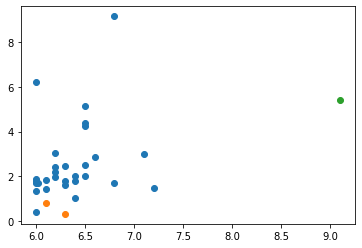

In [39]:
plt.scatter(na_mags, na_mean_trans_times)
plt.scatter(taiwan_mags, taiwan_mean_trans_times)
plt.scatter(tohoku_mags, tohoku_mean_trans_times);

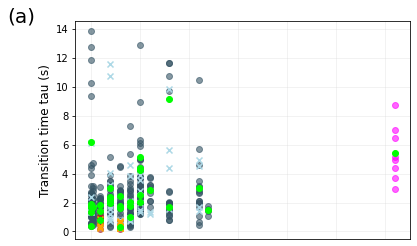

In [40]:
# mag vs tau
# plt.subplot(321)
plt.grid(color = 'lightgray', alpha = 0.35, zorder = 0)
plt.scatter(na_good_results.mag.values, na_good_results.xinter.values-10, marker = 'o', color = '#355464', alpha = 0.6, label = 'NA low error waveforms', zorder = 3)
plt.scatter(na_bad_results.mag.values, na_bad_results.xinter.values-10, marker = 'x', color = 'lightblue', label = 'NA high error waveforms', zorder = 3)
plt.scatter(japan_good_results.mag.values, japan_good_results.xinter.values-10, marker = 'o', color = 'magenta', alpha = 0.6, label = 'Japan low error waveforms', zorder = 3)
plt.scatter(japan_bad_results.mag.values, japan_bad_results.xinter.values-10, marker = 'x', color = 'pink', label = 'Japan high error waveforms', zorder = 3)
plt.scatter(taiwan_good_results.mag.values, taiwan_good_results.xinter.values-10, marker = 'o', color = 'brown', alpha = 0.6, label = 'Taiwan low error waveforms', zorder = 3)
plt.scatter(taiwan_bad_results.mag.values, taiwan_bad_results.xinter.values-10, marker = 'x', color = 'orange', label = 'Taiwan high error waveforms', zorder = 3)
# plt.plot(mags_for_relation, np.log10(source_durs), color = 'lime', label = 'Source duration scaling')
# plt.plot(mags_for_relation, np.log10(rise_times), color = 'turquoise', label = 'Rise time scaling')
# plt.xlabel('Earthquake magnitude')
plt.ylabel('Transition time tau (s)', fontsize = 12)
plt.tick_params(axis = 'both', bottom = False, labelbottom = False, labelsize = 10)
plt.text(x = 5.15, y = 14.5, s = '(a)', fontsize = 20)
plt.scatter(na_mags, na_mean_trans_times, color = 'lime', zorder = 3)
plt.scatter(taiwan_mags, taiwan_mean_trans_times, color = 'lime', zorder = 3)
plt.scatter(tohoku_mags, tohoku_mean_trans_times, color = 'lime', zorder = 3);

In [41]:
mean_mags = np.concatenate((na_mags, taiwan_mags, np.array(tohoku_mags).reshape(1,)))
mean_trans_times = np.concatenate((na_mean_trans_times, taiwan_mean_trans_times, np.array(tohoku_mean_trans_times).reshape(1,)))
mean_m1s = np.concatenate((na_mean_m1s, taiwan_mean_m1s, np.array(tohoku_mean_m1s).reshape(1,)))
mean_m2s = np.concatenate((na_mean_m2s, taiwan_mean_m2s, np.array(tohoku_mean_m2s).reshape(1,)))

good_mags = np.concatenate((na_good_results.mag.values, taiwan_good_results.mag.values, japan_good_results.mag.values))
good_hypdists = np.concatenate((na_good_results.hypdist.values, taiwan_good_results.hypdist.values, japan_good_results.hypdist.values))
good_trans_times = np.concatenate((na_good_results.xinter.values-10, taiwan_good_results.xinter.values-10, japan_good_results.xinter.values-10))
good_m1s = np.concatenate((na_good_results.m1.values, taiwan_good_results.m1.values, japan_good_results.m1.values))
good_m2s = np.concatenate((na_good_results.m2.values, taiwan_good_results.m2.values, japan_good_results.m2.values))

# all_mags = np.concatenate((na_mcmc_results.mag.values, taiwan_mcmc_results.mag.values, japan_mcmc_results_MED.mag.values))
# all_hypdists = np.concatenate((na_mcmc_results.hypdist.values, taiwan_mcmc_results.hypdist.values, japan_mcmc_results_MED.hypdist.values))
# all_trans_times = np.concatenate((na_mcmc_results.xinter.values-10, taiwan_mcmc_results.xinter.values-10, japan_mcmc_results_MED.xinter.values-10))
# all_m1s = np.concatenate((na_mcmc_results.m1.values, taiwan_mcmc_results.m1.values, japan_mcmc_results_MED.m1.values))
# all_m2s = np.concatenate((na_mcmc_results.m2.values, taiwan_mcmc_results.m2.values, japan_mcmc_results_MED.m2.values))
all_mags = np.concatenate((na_mcmc_results.mag.values, taiwan_mcmc_results.mag.values, japan_mcmc_results.mag.values))
all_hypdists = np.concatenate((na_mcmc_results.hypdist.values, taiwan_mcmc_results.hypdist.values, japan_mcmc_results.hypdist.values))
all_trans_times = np.concatenate((na_mcmc_results.xinter.values-10, taiwan_mcmc_results.xinter.values-10, japan_mcmc_results.xinter.values-10))
all_m1s = np.concatenate((na_mcmc_results.m1.values, taiwan_mcmc_results.m1.values, japan_mcmc_results.m1.values))
all_m2s = np.concatenate((na_mcmc_results.m2.values, taiwan_mcmc_results.m2.values, japan_mcmc_results.m2.values))

good_mags_noj = np.concatenate((na_good_results.mag.values, taiwan_good_results.mag.values))
good_hypdists_noj = np.concatenate((na_good_results.hypdist.values, taiwan_good_results.hypdist.values))
good_trans_times_noj = np.concatenate((na_good_results.xinter.values-10, taiwan_good_results.xinter.values-10))
good_m1s_noj = np.concatenate((na_good_results.m1.values, taiwan_good_results.m1.values))
good_m2s_noj = np.concatenate((na_good_results.m2.values, taiwan_good_results.m2.values))

mean_mags_noj = np.concatenate((na_mags, taiwan_mags))
mean_trans_times_noj = np.concatenate((na_mean_trans_times, taiwan_mean_trans_times))
mean_m1s_noj = np.concatenate((na_mean_m1s, taiwan_mean_m1s))
mean_m2s_noj = np.concatenate((na_mean_m2s, taiwan_mean_m2s))

all_mags_noj = np.concatenate((na_mcmc_results.mag.values, taiwan_mcmc_results.mag.values))
all_trans_times_noj = np.concatenate((na_mcmc_results.xinter.values-10, taiwan_mcmc_results.xinter.values-10))


In [42]:
from scipy import stats

In [43]:
# mag vs transition time

In [44]:
means_result = stats.linregress(mean_mags, mean_trans_times, alternative = 'greater')

good_result = stats.linregress(good_mags, good_trans_times, alternative = 'greater')

all_result = stats.linregress(all_mags, all_trans_times, alternative = 'greater')

good_result_noj = stats.linregress(good_mags_noj, good_trans_times_noj, alternative = 'greater')

means_result_noj = stats.linregress(mean_mags_noj, mean_trans_times_noj, alternative = 'greater')

all_result_noj = stats.linregress(all_mags_noj, all_trans_times_noj, alternative = 'greater')

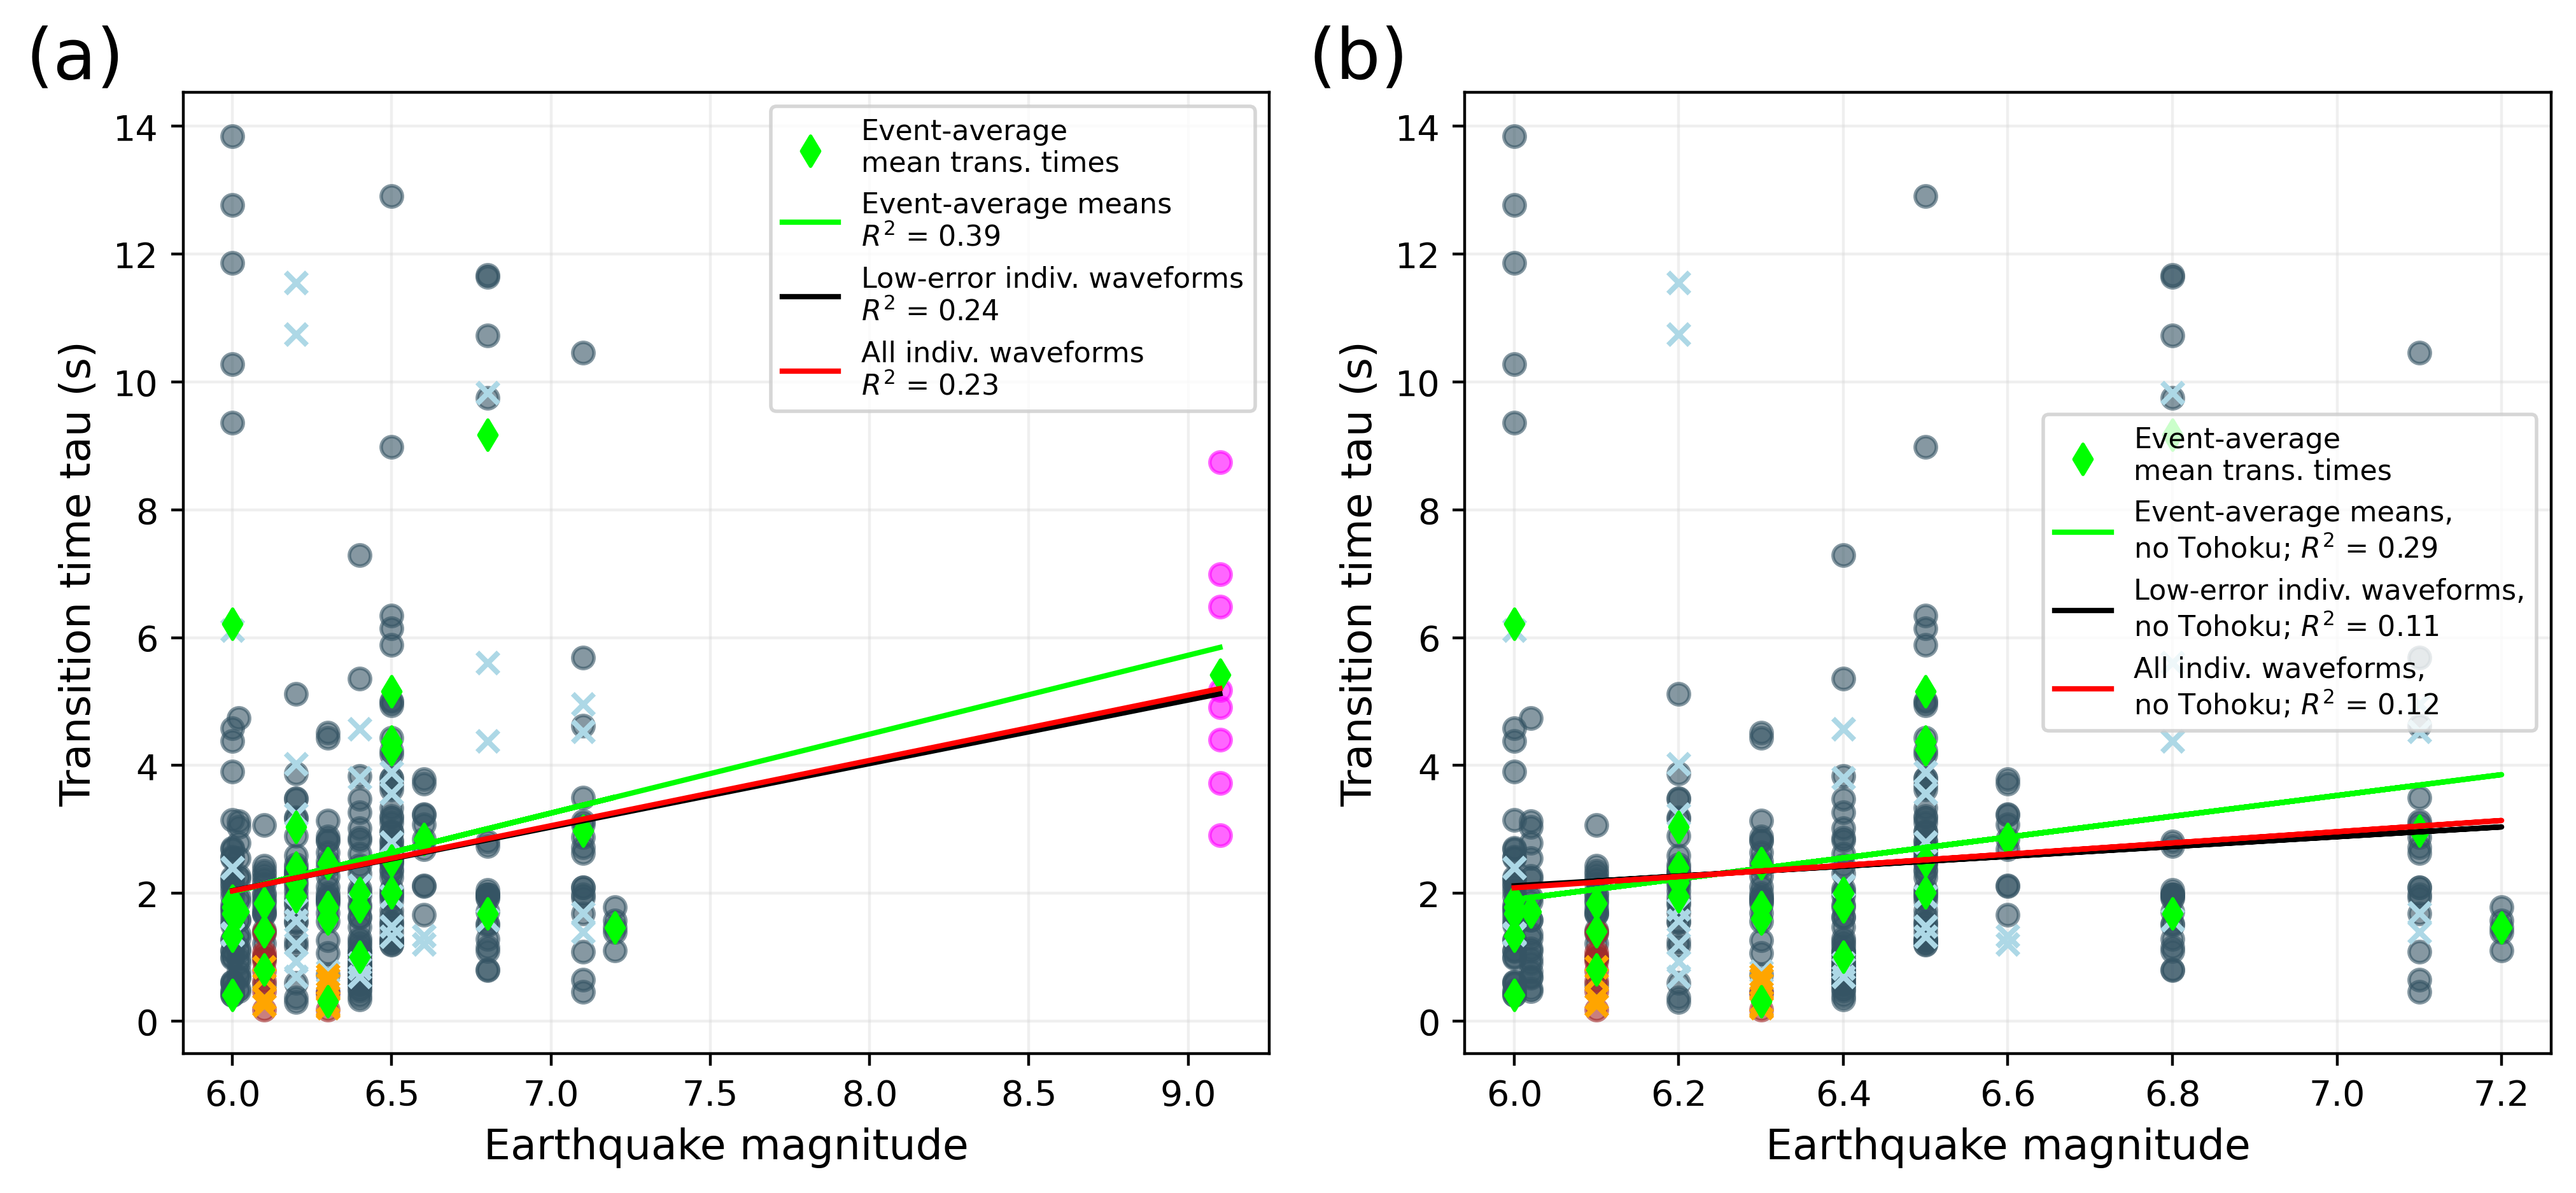

In [45]:
fig = plt.figure(figsize = (12, 5), dpi = 400)

# All datasets mag vs transition time
plt.subplot(121)
plt.grid(color = 'lightgray', alpha = 0.35, zorder = 0)

# Indiv waveforms
plt.scatter(na_good_results.mag.values, na_good_results.xinter.values-10, marker = 'o', color = '#355464', alpha = 0.6, zorder = 3)
plt.scatter(na_bad_results.mag.values, na_bad_results.xinter.values-10, marker = 'x', color = 'lightblue', zorder = 3)
plt.scatter(japan_good_results.mag.values, japan_good_results.xinter.values-10, marker = 'o', color = 'magenta', alpha = 0.6, zorder = 3)
plt.scatter(japan_bad_results.mag.values, japan_bad_results.xinter.values-10, marker = 'x', color = 'pink', zorder = 3)
plt.scatter(taiwan_good_results.mag.values, taiwan_good_results.xinter.values-10, marker = 'o', color = 'brown', alpha = 0.6, zorder = 3)
plt.scatter(taiwan_bad_results.mag.values, taiwan_bad_results.xinter.values-10, marker = 'x', color = 'orange', zorder = 3)

# Evt-avg means
plt.scatter(na_mags, na_mean_trans_times, color = 'lime', marker = 'd', zorder = 3, label = 'Event-average\nmean trans. times')
plt.scatter(taiwan_mags, taiwan_mean_trans_times, color = 'lime', marker = 'd',zorder = 3)
plt.scatter(tohoku_mags, tohoku_mean_trans_times, color = 'lime', marker = 'd',zorder = 3)

# Trendlines
plt.plot(mean_mags, mean_mags * means_result.slope + means_result.intercept, color = 'lime', zorder = 3, label = 'Event-average means\n$R^2$ = ' + str(round(means_result.rvalue,2)))
plt.plot(good_mags, good_mags * good_result.slope + good_result.intercept, color = 'black', zorder = 3, label = 'Low-error indiv. waveforms\n$R^2$ = ' + str(round(good_result.rvalue,2)))
plt.plot(all_mags, all_mags * all_result.slope + all_result.intercept, color = 'red', zorder = 3, label = 'All indiv. waveforms\n$R^2$ = ' + str(round(all_result.rvalue,2)));

plt.xlabel('Earthquake magnitude', fontsize = 12)
plt.ylabel('Transition time tau (s)', fontsize = 12)
plt.legend(fontsize = 8)
plt.text(x = 5.35, y = 14.75, s = '(a)', fontsize = 20)

# No Japan mag vs transition time
plt.subplot(122)
plt.grid(color = 'lightgray', alpha = 0.35, zorder = 0)

# Indiv waveforms
plt.scatter(na_good_results.mag.values, na_good_results.xinter.values-10, marker = 'o', color = '#355464', alpha = 0.6, zorder = 3)
plt.scatter(na_bad_results.mag.values, na_bad_results.xinter.values-10, marker = 'x', color = 'lightblue', zorder = 3)
plt.scatter(taiwan_good_results.mag.values, taiwan_good_results.xinter.values-10, marker = 'o', color = 'brown', alpha = 0.6, zorder = 3)
plt.scatter(taiwan_bad_results.mag.values, taiwan_bad_results.xinter.values-10, marker = 'x', color = 'orange', zorder = 3)

# Evt-avg means
plt.scatter(na_mags, na_mean_trans_times, marker = 'd', color = 'lime', zorder = 3, label = 'Event-average\nmean trans. times')
plt.scatter(taiwan_mags, taiwan_mean_trans_times, marker = 'd', color = 'lime', zorder = 3)

# Trendlines
plt.plot(mean_mags_noj, mean_mags_noj * means_result_noj.slope + means_result_noj.intercept, color = 'lime', zorder = 3, label = 'Event-average means,\nno Tohoku; $R^2$ = ' + str(round(means_result_noj.rvalue,2)))
plt.plot(good_mags_noj, good_mags_noj * good_result_noj.slope + good_result_noj.intercept, color = 'black', zorder = 3, label = 'Low-error indiv. waveforms,\nno Tohoku; $R^2$ = ' + str(round(good_result_noj.rvalue,2)))
plt.plot(all_mags_noj, all_mags_noj * all_result_noj.slope + all_result_noj.intercept, color = 'red', zorder = 3, label = 'All indiv. waveforms,\nno Tohoku; $R^2$ = ' + str(round(all_result_noj.rvalue,2)))

plt.legend(fontsize = 8)
plt.xlabel('Earthquake magnitude', fontsize = 12)
plt.ylabel('Transition time tau (s)', fontsize = 12)
plt.text(x = 5.75, y = 14.75, s = '(b)', fontsize = 20)

plt.subplots_adjust(hspace = 0, wspace = 0.18)

plt.show()

# plt.savefig('/Users/sydneydybing/StrainProject/2024/Manuscript/Figures/renamed_figs/Figure_6.jpg', format = 'JPG')
# plt.close();